In [1]:
# Dependencies
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import math
import seaborn as sns

In [2]:
# Location files
features_loc = "../dataset/train_feat_cleaned.pickle"
target_loc = "../dataset/train_target_cleaned.pickle"

In [3]:
features_df = pd.read_pickle(features_loc)
target_df = pd.read_pickle(target_loc)

In [4]:
# Create vector for columns of questions
questions = list(target_df.columns[6:29])
questions.remove('LON')
questions = [q for q in questions if q not in ('LON', 'N_1', 'N_2', 'N_3','H_1', 'H_2', 'H_3')]
questions.sort()
print(questions)

['A_1', 'A_2', 'A_3', 'E_1', 'E_2', 'E_3', 'HAP', 'M_1', 'M_2', 'M_3', 'P_1', 'P_2', 'P_3', 'R_1', 'R_2', 'R_3']


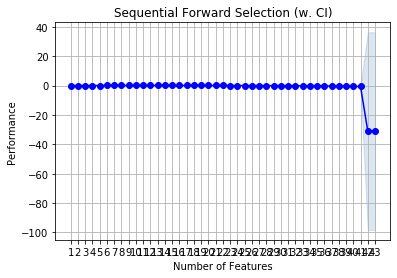

In [5]:
# Use MLXtend package to automaticly do forward feature selection

X = features_df
y = target_df["PERMA"]

lr = LinearRegression()

sfs = SFS(lr, 
          k_features="best", 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='ci')

plt.title('Sequential Forward Selection (w. CI)')
plt.grid()
plt.show()

In [6]:
best_feat = list(sfs.k_feature_names_)
print("Amount chosen", len(sfs.k_feature_idx_),
    "CV score:", sfs.k_score_,
      
    "Best features:", *best_feat, sep = "\n")
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

Amount chosen
10
CV score:
0.1581231475884423
Best features:
data_memorability
face_emotion_CALM
face_emotion_CONFUSED
face_emotion_SURPRISED
male
emotion_label_acceptance
emotion_label_rage
emotion_label_sadness
emotion_label_serenity
emotion_label_terror


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(36,)","[0.04627949378560514, 0.0352261223865199, -0.0...",-0.0166715,"(emotion_label_rage,)",0.0655482,0.088255,0.0294183
2,"(11, 36)","[0.07908154341884432, 0.11079008038824945, -0....",0.0157638,"(face_emotion_SURPRISED, emotion_label_rage)",0.0945456,0.127298,0.0424325
3,"(11, 36, 40)","[0.0950973840454793, 0.22239890014530017, -0.0...",0.0302235,"(face_emotion_SURPRISED, emotion_label_rage, e...",0.107546,0.144801,0.0482671
4,"(11, 19, 36, 40)","[0.12592660614954532, 0.17691707160892067, -0....",0.0523776,"(face_emotion_SURPRISED, emotion_label_accepta...",0.133623,0.179912,0.0599707
5,"(7, 11, 19, 36, 40)","[0.1486791368399274, 0.30251349786932913, -0.0...",0.0730996,"(face_emotion_CALM, face_emotion_SURPRISED, em...",0.142449,0.191796,0.0639318
6,"(7, 11, 19, 36, 37, 40)","[0.16153635506099873, 0.2979850668171723, 0.04...",0.0925751,"(face_emotion_CALM, face_emotion_SURPRISED, em...",0.143368,0.193033,0.0643444
7,"(1, 7, 11, 19, 36, 37, 40)","[0.18547278864008043, 0.3240950679525415, 0.01...",0.120282,"(data_memorability, face_emotion_CALM, face_em...",0.127436,0.171582,0.0571941
8,"(1, 7, 11, 15, 19, 36, 37, 40)","[0.1470597251584458, 0.4401372848721411, 0.032...",0.137124,"(data_memorability, face_emotion_CALM, face_em...",0.123562,0.166365,0.0554551
9,"(1, 7, 11, 15, 19, 36, 37, 38, 40)","[0.1798831776927734, 0.4545027001934535, 0.097...",0.155582,"(data_memorability, face_emotion_CALM, face_em...",0.117852,0.158677,0.0528925
10,"(1, 7, 8, 11, 15, 19, 36, 37, 38, 40)","[0.19296597369141477, 0.48066986461312833, 0.1...",0.158123,"(data_memorability, face_emotion_CALM, face_em...",0.117669,0.158432,0.0528106


In [7]:
# Create compound model of 6 perma score elements
perma_elements = ["P", "E", "R", "M", "A", "HAP"]

best_features = dict()

for question in perma_elements:
    lr = LinearRegression()
    sfs = SFS(lr, 
              k_features="best", 
              forward=True, 
              floating=False, 
              scoring='r2',
              cv=10)
    sfs = sfs.fit(features_df, target_df[question])
    best_features[question] = (sfs.k_score_, sfs.k_feature_names_)

In [8]:
random_list = np.random.randint(0, features_df.shape[0], 15)

In [138]:
results_lr = []
results_svm = []

for random_seed in random_list:
    # Evaluate the compound model

    # Create training and test sets
    X_train_flex, X_test_flex, y_train_flex, y_test_flex = train_test_split(features_df, target_df
                                                        , test_size = 0.30, random_state=random_seed)
    
    predicted_data = pd.DataFrame()

    for element in perma_elements:
        # Create the regressor: lr
        lr = LinearRegression()

        # Extract the best features for the element
        features = list(best_features[element][1])

        # Fit the regressor to the training data
        lr.fit(X_train_flex[features], y_train_flex[element])

        # Predict on the test data: y_pred
        y_pred = lr.predict(X_test_flex[features])

        predicted_data[element] = y_pred

    predicted_data["PERMA"] = predicted_data.mean(1)


    # Compute and print R^2 and RMSE
    results_lr.append([random_seed, \
                         r2_score(y_test_flex["PERMA"], predicted_data["PERMA"].values),\
                         np.sqrt(mean_squared_error(y_test_flex["PERMA"], predicted_data["PERMA"].values))])
    
    # Evaluate compound model with an SVM

    # Create training and test sets
    X_train_flex, X_test_flex, y_train_flex, y_test_flex = train_test_split(features_df, target_df
                                                        , test_size = 0.10, random_state=random_seed)
    predicted_data = pd.DataFrame()

    for element in perma_elements:
        # Create the regressor: SVR
        clf = SVR(kernel='linear', gamma='scale', C=1.3, epsilon=0)

        # Extract the best features for the element
        features = list(best_features[element][1])

        # Fit the regressor to the training data
        clf.fit(X_train_flex[features], y_train_flex[element])

        # Predict on the test data: y_pred
        y_pred = clf.predict(X_test_flex[features])

        predicted_data[element] = y_pred

    predicted_data["PERMA"] = predicted_data.mean(1)

    # Compute and print R^2 and RMSE
    results_svm.append([random_seed, \
                         r2_score(y_test_flex["PERMA"], predicted_data["PERMA"].values),\
                         np.sqrt(mean_squared_error(y_test_flex["PERMA"], predicted_data["PERMA"].values))])

    
#random_results_lr = pd.DataFrame(results_lr, columns={'SEED', 'LR_R2', 'LR_RMSE'})
#random_results_svm = pd.DataFrame(results_svm, columns={'SEED', 'SVM_R2', 'SVM_RMSE'})

random_results_lr = pd.DataFrame(results_lr)
random_results_svm = pd.DataFrame(results_svm)

#random_results_svm = random_results_svm[['SEED', 'SVM_R2', 'SVM_RMSE']]

random_results = pd.merge(random_results_svm, random_results_lr, on=0)
random_results = random_results.rename(columns={0:'seed', '1_x' : 'LR_R2', '2_x':'LR_RMSE', '1_y':'SVM_R2', '2_y':'SVM_RMSE'})
random_results = random_results.sort_values(by='seed')
random_results.set_index('seed', inplace=True)

In [62]:
# random_results.reset_index(inplace=True)
random_results.set_index('seed', inplace=True)

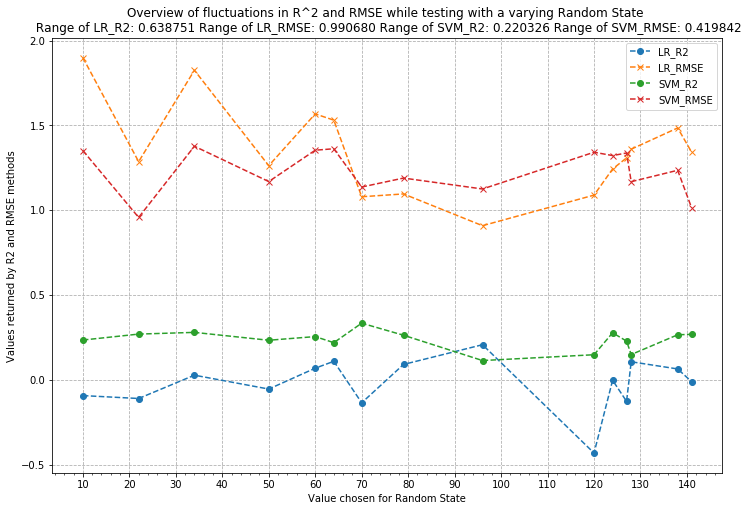

In [144]:
# Plotting
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(12,8))

#for i, (name, row) in enumerate(random_results.iterrows()):
#    ax = plt.subplot(5,3, i+1)
#    ax.set_title('Random State: %i' % row.name)
#    #ax.set_aspect('equal')
#    ax.bar(row.index, height=row)
ax = plt.gca()
#ax.set_xticks(random_results.index)
#plt.xticks(np.arange(min(random_results.index), max(random_results.index)+1, 10.0))
#ax.set_xticklabels(random_results.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))

plt.plot(random_results.index, random_results['LR_R2'], 'o--')
plt.plot(random_results.index, random_results['LR_RMSE'], 'x--')
plt.plot(random_results.index, random_results['SVM_R2'], 'o--')
plt.plot(random_results.index, random_results['SVM_RMSE'], 'x--')

LR_R2_range = random_results['LR_R2'].max() - random_results['LR_R2'].min()
LR_RMSE_range = random_results['LR_RMSE'].max() - random_results['LR_RMSE'].min()
SVM_R2_range = random_results['SVM_R2'].max() - random_results['SVM_R2'].min()
SVM_MSRE_range = random_results['SVM_RMSE'].max() -  random_results['SVM_RMSE'].min() 

plt.title('Overview of fluctuations in R^2 and RMSE while testing with a varying Random State \n \
Range of LR_R2: %f Range of LR_RMSE: %f Range of SVM_R2: %f Range of SVM_RMSE: %f' \
          % (LR_R2_range, LR_RMSE_range,SVM_R2_range,  SVM_MSRE_range))
plt.xlabel('Value chosen for Random State')
plt.ylabel('Values returned by R2 and RMSE methods')

plt.grid(linestyle='--')
plt.legend(random_results.columns)

plt.savefig('../images/residual_eval/r2_rmse_evaluations_on_lr_and_svm.png', format='png')
plt.show()

In [11]:
# Evaluate compound model with an SVM

# Create training and test sets
X_train_flex, X_test_flex, y_train_flex, y_test_flex = train_test_split(features_df, target_df
                                                    , test_size = 0.10, random_state=69)
predicted_data = pd.DataFrame()

for element in perma_elements:
    # Create the regressor: SVR
    clf = SVR(kernel='linear', gamma='scale', C=1.3, epsilon=0)

    # Extract the best features for the element
    features = list(best_features[element][1])
    
    # Fit the regressor to the training data
    clf.fit(X_train_flex[features], y_train_flex[element])

    # Predict on the test data: y_pred
    y_pred = clf.predict(X_test_flex[features])
  
    predicted_data[element] = y_pred
    
predicted_data["PERMA"] = predicted_data.mean(1)

# Compute and print R^2 and RMSE
print("R^2: {}".format(r2_score(y_test_flex["PERMA"], predicted_data["PERMA"].values)))
rmse = np.sqrt(mean_squared_error(y_test_flex["PERMA"], predicted_data["PERMA"].values))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.15709179718665567
Root Mean Squared Error: 1.540468306780597


#### differences in scores

In [12]:
print(y_test_flex["PERMA"].max() - predicted_data["PERMA"].max())
print(y_test_flex["PERMA"].min() - predicted_data["PERMA"].min())

for foo in zip(y_test_flex["PERMA"], predicted_data["PERMA"]):
    print(foo[0] - foo[1])

1.2611521177548228
-3.5381651056666703
-0.7881651056666703
0.7117796145360558
-2.4392039643840535
-0.5447667006488137
-0.2854780721995338
1.3317786348996892
-3.686307649765973
-2.3812578134771982
0.1428122447206155
-0.6781439728118315
0.1591450764463156
-0.28950255724270146
0.011152117754822832
-2.0241696278832793
-1.5556774804350075
